<a href="https://colab.research.google.com/github/atanasov633/AdvancedEconometricsFinanceProject/blob/master/ANN_housing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline
import re

ModuleNotFoundError: ignored

## DATA - summary

### Import Housing Dataset 

In [ ]:
path = ""

In [ ]:
df_housing = pd.read_csv(path)

In [ ]:
df_housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


#### Get overall statistics for the data

In [ ]:
df_housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### Check for missing data

In [ ]:
df_housing.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
# no missing data found

#### To be able to explore how the whole data affects the price, we need to hot encode the address and make it a numerical variable

In [ ]:
len(df_housing['Address'].unique())
### all addresses are different

5000

###### Pattern in Address could be different. We will take the state.

In [ ]:
# a = re.findall(r'\b[a-z]{2}\b', df_housing['Address'][5], re.I)
# a[0]

In [ ]:
for x in range(len(df_housing)):
    state = re.findall(r'\b[a-z]{2}\b', df_housing['Address'][x], re.I)
    df_housing['Address'][x] = state[0]

<ipython-input-18-f17555c90d0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing['Address'][x] = state[0]


In [ ]:
df_housing['Address'].unique()

array(['NE', 'CA', 'WI', 'AP', 'AE', 'KS', 'CO', 'TN', 'AA', 'NM', 'PW',
       'AR', 'HI', 'ME', 'IN', 'MI', 'DE', 'AZ', 'MA', 'MN', 'AL', 'NY',
       'NV', 'VA', 'ID', 'OK', 'NH', 'MO', 'WV', 'WY', 'MH', 'UT', 'SD',
       'CT', 'AK', 'WA', 'RI', 'NJ', 'KY', 'NC', 'IA', 'VT', 'FM', 'ND',
       'LA', 'MP', 'OR', 'TX', 'DC', 'PR', 'MT', 'AS', 'OH', 'MS', 'IL',
       'VI', 'GA', 'PA', 'MD', 'SC', 'GU', 'FL', 'Wu', 'Jo', 'Le'],
      dtype=object)

In [ ]:
df_housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE


### Basic Visualizations of the Dataset 

In [ ]:
# Correlation Map

<AxesSubplot:>

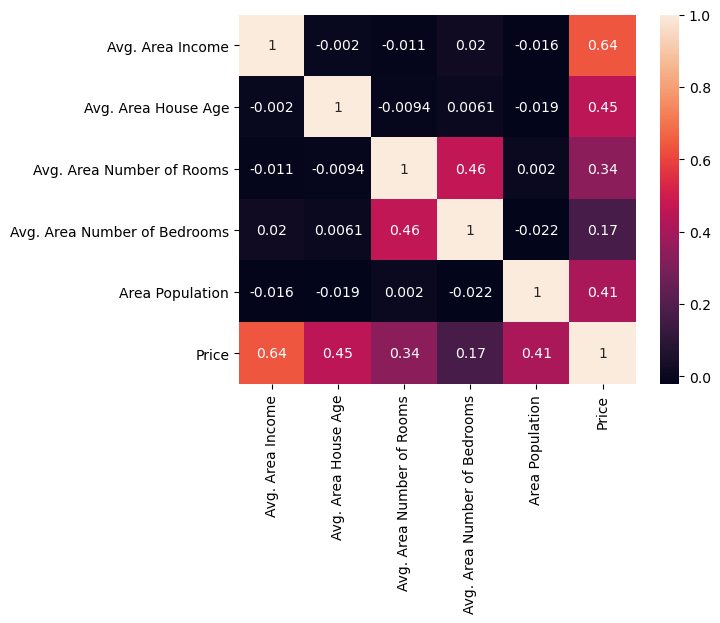

In [ ]:
sns.heatmap(df_housing.corr(), annot=True)

In [ ]:
df_housing.hvplot.scatter(x='Avg. Area Income', y='Price')

In [ ]:
df_housing.hvplot.scatter(x='Avg. Area Number of Rooms', y='Price')

In [ ]:
df_housing.hvplot.scatter(x='Avg. Area Number of Rooms', y='Price')

### Hot Encode the States

### Assign X and y as Independent / Dependent variables

In [ ]:
X = df_housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = df_housing['Price']

## Train / Test Data Split 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# test size is recommended to be around 0.2-0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### We standardize the X_train & X_test sets, because we don't want (due to outliers) some variables's distributions to affect the other's 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

### To prepare the data for linear regression we need to:
    - assume linear relationship in our data
    - remove outliers (noise)
    - get rid of collinearity (can cause overfitting)
    - Standartization & Normalization of the data

In [ ]:
# Standartization of data is performed - we remove mean and scale to the variance
# the idea is to make the data to behave in a similar way
# because if some variable has variance much larger than the rest, 
# this might affect the learning from the features.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression(normalize=True)

In [ ]:
# Train the linear regression model
lin_reg.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [ ]:
y_lin_reg_pred = lin_reg.predict(X_test_scaled)

In [ ]:
mean_absolute_error(y_lin_reg_pred, y_test)

82657.94605892095

## Artificial Neural Network

In [ ]:
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [ ]:
from sklearn.model_selection import GridSearchCV 

###### we initialize the number of columns, as they will be the input variables to the first layer

In [ ]:
n_cols = X_train.shape[1]

##### Learning rate controls the weight at the end of each batch
##### momentum controls how much to let the previous update influence the current weight update.
##### Decay indicates the learning rate decay over each update 

Typical values for those hyperparameters are lr=0.01, decay=1e-6, momentum=0.9, and nesterov=True.

### ANN model function /using ADAM optimization algorithm/

In [ ]:
# Prepare Data in an array format:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
def ann_model_1(neurons):
    """
    The ann_model_1 function will be used for the KerasClassifier, and for the 
    GridSearchCV to optimize the hyperparameters. 
    It builds a Neural Network with 1 hidden layer.
    It uses ReLU as a standard activation function, as it is preferred for regression tasks.
    Loss function is mean_squared_error as it is preferred again for regression tasks
    Optimizer is the ADAM algorithm
    
    Output: a whole ANN model
    """
    model = Sequential()
    
    #Input layer
    model.add(Dense(5, activation='relu', input_shape=(5,)))
    
    #First hidden layer
    model.add(Dense(neurons, activation='relu'))
    
    #Dropout rate - normally 0.2 is suggested
    model.add(Dropout(0.2))
    
    #Output layer

    model.add(Dense(1))
    
    #first apply the optimizing method adam, mean_squared_error is preferreable for regression  tasks)

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
    return model

In [ ]:
# Might be good to add a dropout layer

In [ ]:
#TODO: might need a dropout
#TODO: learning_rate
#TODO: confusion_matrix

In [ ]:
# We can fix a random seed for repruducibility
seed = 10
tf.random.set_seed(seed)

In [ ]:
# Create Model
model_1 = KerasClassifier(model=ann_model_1, epochs = 100, batch_size=50, verbose=0)

In [ ]:
# Hyperparameters to test:
# batch_size = [10,20,50,80,100]
# epochs = [10, 50, 100]
neurons = [1,5,10,20,30,50,80,100]

In [ ]:
# Parameters for the GridSearchCV:
params_grid = dict(model__neurons=neurons)

### Create the model

In [ ]:
model_1 = KerasClassifier(model=ann_model_1, epochs = 100, batch_size=50, verbose=0)

#### GridSearchCV for Hyperparameters:


In [ ]:
# n_jobs = -1 allows all cores of the machine to be used
# cv = 5 , means the data is cross - validated on 5 parts
grid_1 = GridSearchCV(estimator=model_1, param_grid=params_grid, n_jobs=-1, cv=5)

In [ ]:
grid_res_1 = grid_1.fit(X_train, y_train)

ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\Asus\anaconda3\lib\site-packages\scikeras\wrappers.py", line 762, in fit
    self._fit(
  File "C:\Users\Asus\anaconda3\lib\site-packages\scikeras\wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "C:\Users\Asus\anaconda3\lib\site-packages\scikeras\wrappers.py", line 848, in _initialize
    self.target_encoder_ = self.target_encoder.fit(y)
  File "C:\Users\Asus\anaconda3\lib\site-packages\scikeras\utils\transformers.py", line 176, in fit
    raise ValueError(
ValueError: Unknown label type: continuous.

To implement support, subclass KerasClassifier and override ``target_encoder`` with a transformer that supports this label type.

For information on sklearn target types, see: * https://scikit-learn.org/stable/modules/generated/sklearn.utils.multiclass.type_of_target.html * https://scikit-learn.org/stable/modules/multiclass.html

For information on the SciKeras data transformation interface, see: * https://www.adriangb.com/scikeras/stable/advanced.html#data-transformers


## Train the model

In [ ]:
ann_1 = ann_model_1(50)

NameError: name 'Dropout' is not defined

In [ ]:
model.fit(optimizer='adam', loss='mse')

NameError: name 'model' is not defined

In [ ]:
model.fit(X_train, y_train,
         validation_data=(X_train, y_test),
         batch_size=100,
         epochs=100)

Epoch 1/100
125/125 [==============================] - 4s 13ms/step - loss: 1642502029312.0000 - accuracy: 0.0000e+00 - val_loss: 1643060527104.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
125/125 [==============================] - 1s 11ms/step - loss: 1642069884928.0000 - accuracy: 0.0000e+00 - val_loss: 1642163470336.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
125/125 [==============================] - 1s 11ms/step - loss: 1640384954368.0000 - accuracy: 0.0000e+00 - val_loss: 1639483047936.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
125/125 [==============================] - 1s 9ms/step - loss: 1636427235328.0000 - accuracy: 0.0000e+00 - val_loss: 1634035433472.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
125/125 [==============================] - 1s 8ms/step - loss: 1629323001856.0000 - accuracy: 0.0000e+00 - val_loss: 1625031180288.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
125/125 [==============================] - 1s 7ms/step - loss: 1618385043456.0000 - accuracy: 0.0000e+00 - val

Epoch 48/100
125/125 [==============================] - 1s 7ms/step - loss: 64536584192.0000 - accuracy: 0.0000e+00 - val_loss: 63809662976.0000 - val_accuracy: 0.0000e+00
Epoch 49/100
125/125 [==============================] - 1s 8ms/step - loss: 60722130944.0000 - accuracy: 0.0000e+00 - val_loss: 60162928640.0000 - val_accuracy: 0.0000e+00
Epoch 50/100
125/125 [==============================] - 1s 7ms/step - loss: 57260855296.0000 - accuracy: 0.0000e+00 - val_loss: 56819691520.0000 - val_accuracy: 0.0000e+00
Epoch 51/100
125/125 [==============================] - 1s 8ms/step - loss: 54126645248.0000 - accuracy: 0.0000e+00 - val_loss: 53809352704.0000 - val_accuracy: 0.0000e+00
Epoch 52/100
125/125 [==============================] - 1s 8ms/step - loss: 51264761856.0000 - accuracy: 0.0000e+00 - val_loss: 51033919488.0000 - val_accuracy: 0.0000e+00
Epoch 53/100
125/125 [==============================] - 1s 10ms/step - loss: 48644554752.0000 - accuracy: 0.0000e+00 - val_loss: 48473137152

In [ ]:
# To test the prediction accuracy we are going to predict on the X test - data 
# and compare it to  the y test - data

In [ ]:
y_pred = model.predict(X_test_scaled)

32/32 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_pred)

90346.02287455049

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_pred)

12888903039.640652

### Cross-Validation --> Tuning the Hyperparameters

In [ ]:
#inga check